In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import math
from scipy import stats
from scipy.stats import norm
from scipy.special import softmax
from sklearn.metrics import classification_report
import plotly.graph_objects as grp
from  dataclasses import dataclass
import keras
from sklearn.preprocessing import OneHotEncoder
from scipy import optimize
from sklearn.metrics import multilabel_confusion_matrix
import plotly.subplots as sp
import plotly.graph_objects as go
import missingno as msno
from pandas.core.common import random_state
from scipy import optimize
from sklearn import svm
from scipy.optimize import Bounds, minimize
from os import supports_effective_ids

In [2]:
df = pd.read_csv('/content/Occupancy_Estimation.csv')
df = pd.DataFrame(df)
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [3]:
num_cols = ['S1_Temp','S2_Temp','S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2','S5_CO2_Slope']
cat_cols = ['S6_PIR','S7_PIR','Room_Occupancy_Count']

# Exploratory Data Analysis

In [4]:
df.shape

(10129, 19)

# Data types of columns

In [5]:
df.dtypes

,0
Date,object
Time,object
S1_Temp,float64
S2_Temp,float64
S3_Temp,float64
S4_Temp,float64
S1_Light,int64
S2_Light,int64
S3_Light,int64
S4_Light,int64


# Checking for Missing Values

In [6]:
df.isna().sum()

,0
Date,0
Time,0
S1_Temp,0
S2_Temp,0
S3_Temp,0
S4_Temp,0
S1_Light,0
S2_Light,0
S3_Light,0
S4_Light,0


In [7]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


# Unique values in each column

In [8]:
df.nunique()

,0
Date,7
Time,10129
S1_Temp,24
S2_Temp,69
S3_Temp,29
S4_Temp,27
S1_Light,68
S2_Light,82
S3_Light,177
S4_Light,75


# Histograms

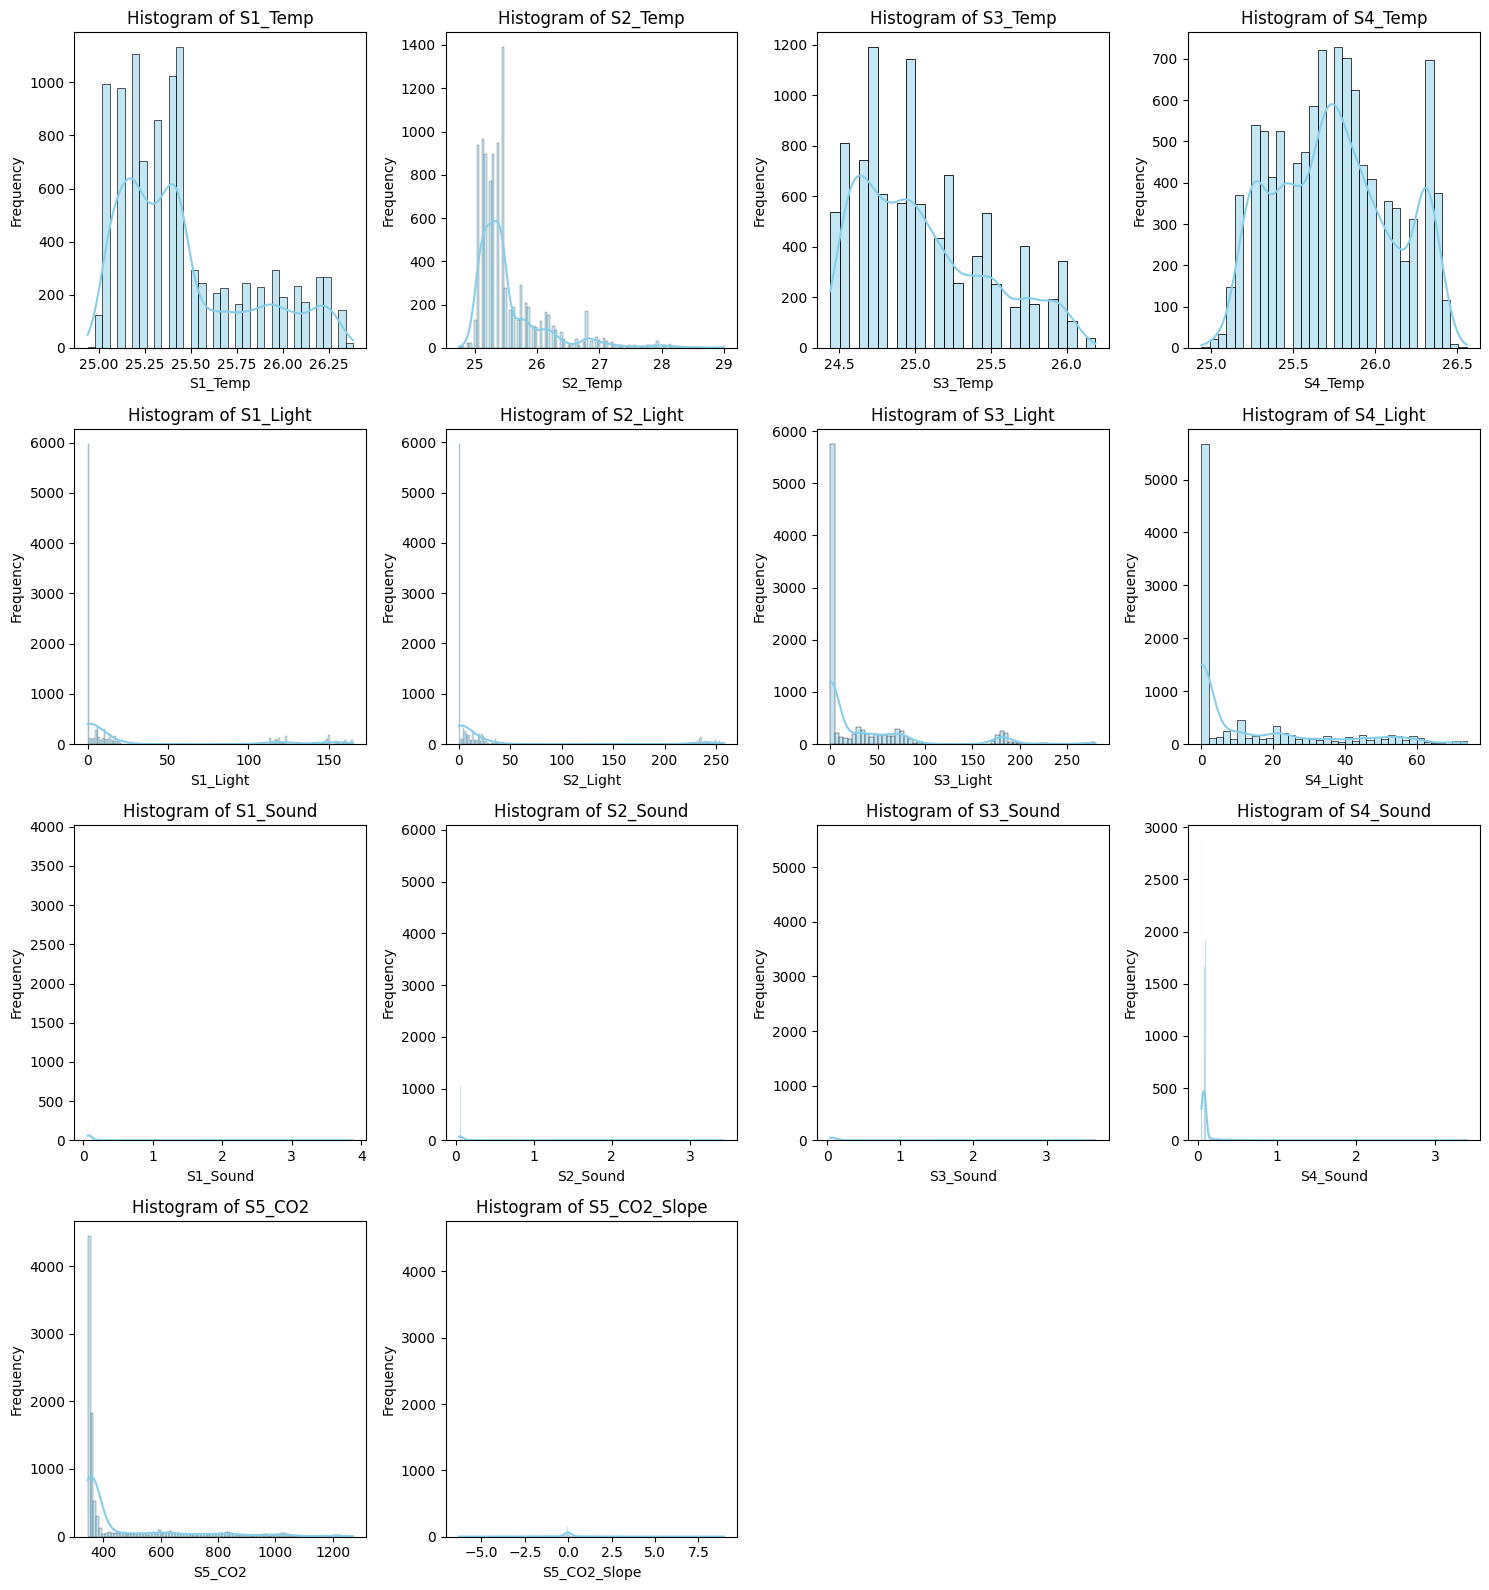

In [32]:
# Set the number of rows and columns for the plot grid
num_plots = len(num_cols)
cols = 4  # Number of columns in the grid
rows = math.ceil(num_plots / cols)  # Number of rows

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten the grid to easily iterate over

# Plot each histogram
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Checking for Duplicates

In [10]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 0


# Seasonality check

In [11]:
df['Date'].unique()

array(['2017/12/22', '2017/12/23', '2017/12/24', '2017/12/25',
       '2017/12/26', '2018/01/10', '2018/01/11'], dtype=object)

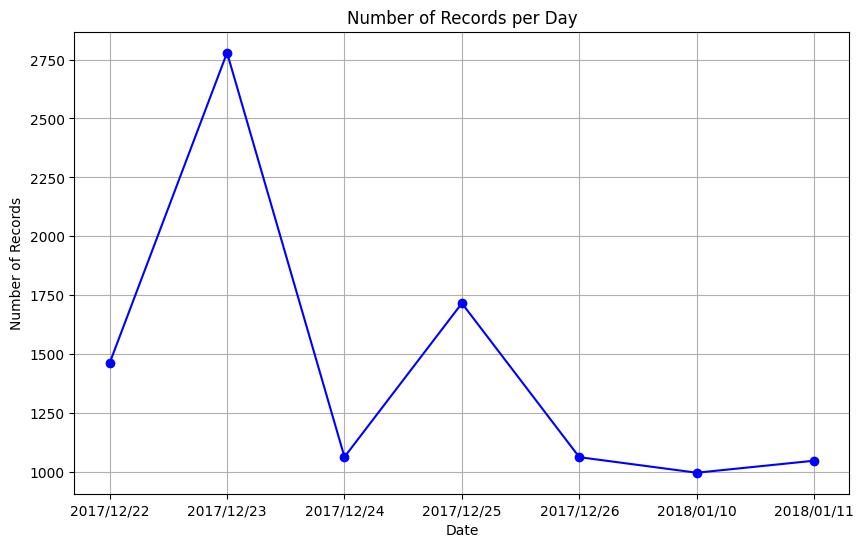

In [12]:
# Group by date and count the number of records for each day
daily_counts = df.groupby('Date').size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

In [13]:
df['Date_time'] = pd.to_datetime(df['Date'] +' '+ df['Time'])
dt_time = df.pop('Date_time')
df.insert(2, 'Date_time', dt_time)

df['Hours'] = df['Date_time'].dt.hour
df['Time_of_Day'] = pd.cut(df['Hours'], bins = [0,6,12,17,22,24], labels = ['Night','Morning','Afternoon','Evening','Night'], include_lowest=True, ordered = False)

df.pop('Hours')
day_time = df.pop('Time_of_Day')
df.insert(2, 'Time_of_Day', day_time)


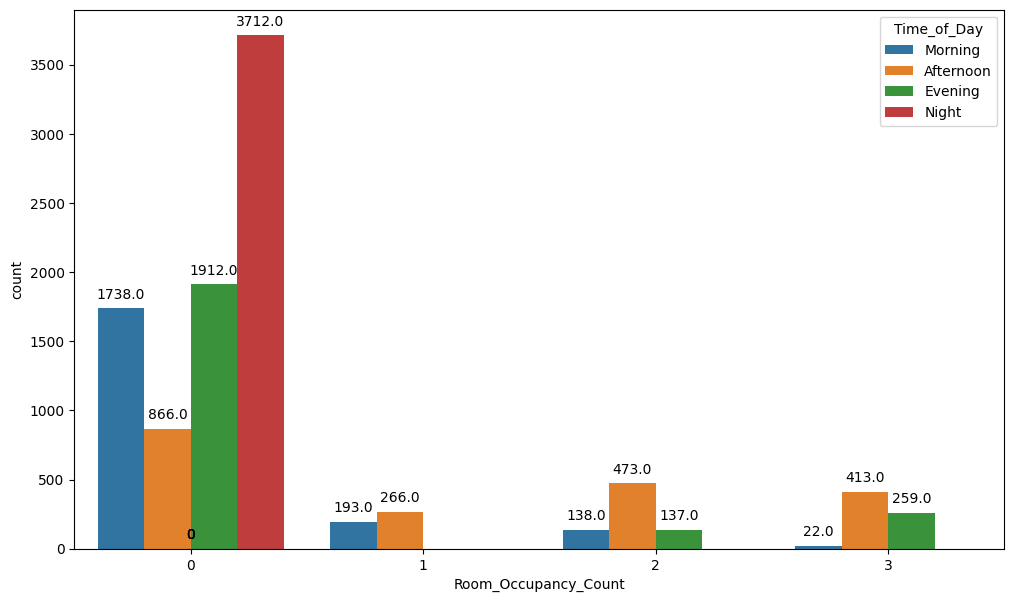

In [14]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count', hue = 'Time_of_Day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [15]:
# Group by date and time_of_day, calculate average room occupancy
avg_occupancy = df.groupby(['Date_time', 'Time_of_Day'])['Room_Occupancy_Count'].mean().reset_index()

# Pivot the DataFrame for easier plotting
pivot_df = avg_occupancy.pivot(index='Date_time', columns='Time_of_Day', values='Room_Occupancy_Count')

<ipython-input-15-c8f6d6836c4d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_occupancy = df.groupby(['Date_time', 'Time_of_Day'])['Room_Occupancy_Count'].mean().reset_index()


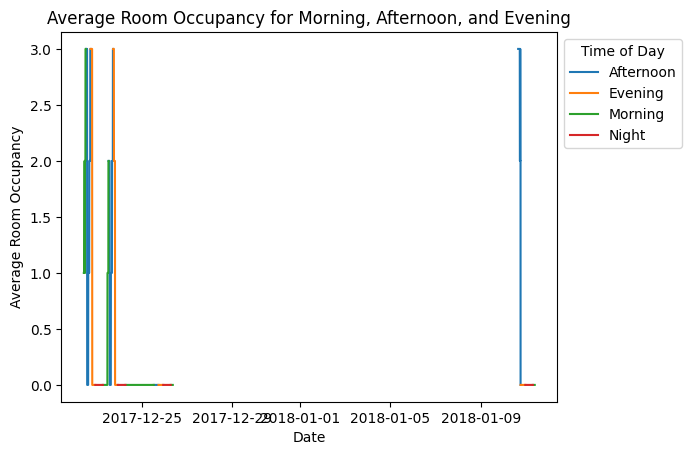

In [16]:
# Plot lines for each time of day
for time_of_day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[time_of_day], label=time_of_day)

plt.title('Average Room Occupancy for Morning, Afternoon, and Evening')
plt.xlabel('Date')
plt.ylabel('Average Room Occupancy')
plt.legend(title='Time of Day', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

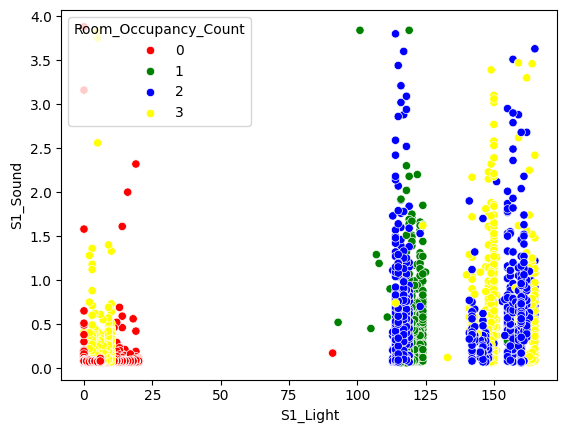

In [17]:
sns.scatterplot(data = df, x = 'S1_Light', y = 'S1_Sound', hue = 'Room_Occupancy_Count', palette = ['Red','Green','Blue','Yellow'])
plt.show()

# Boxplot showing range and outliers for each numerical column

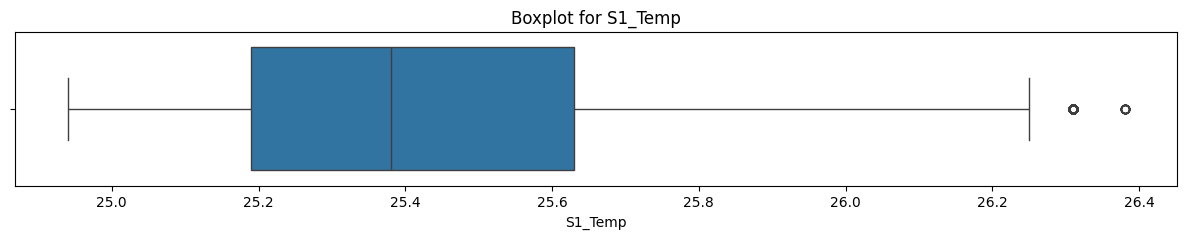

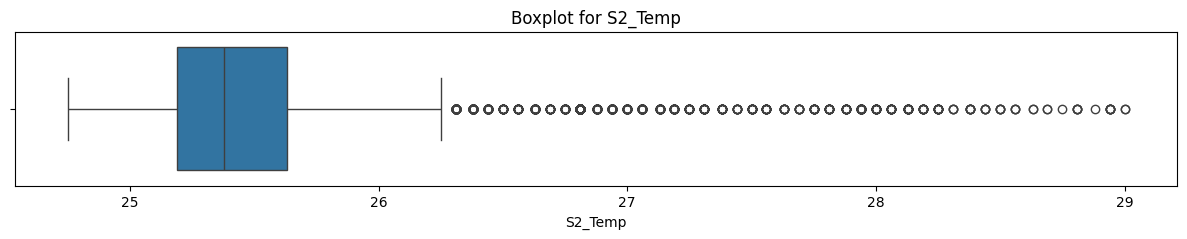

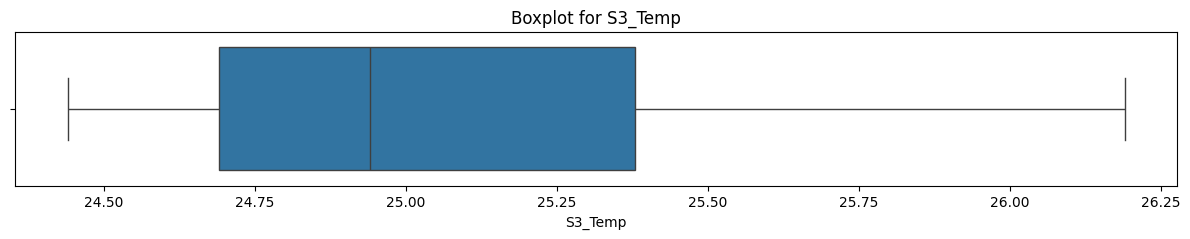

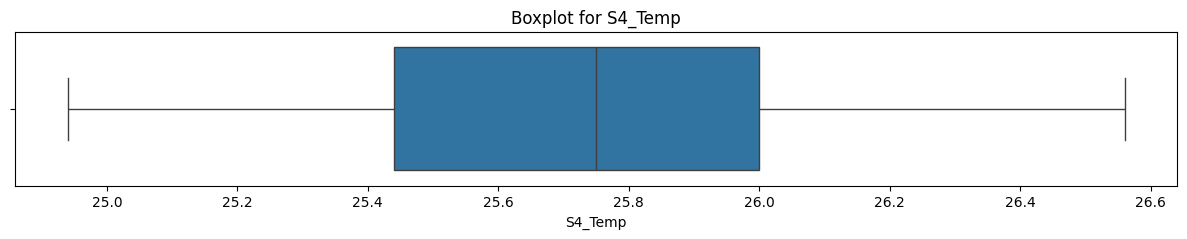

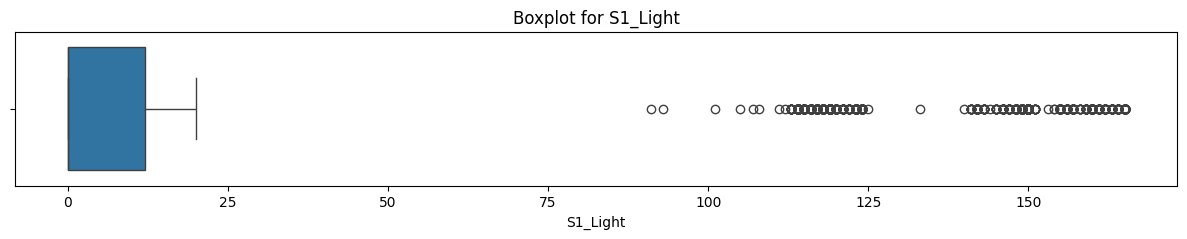

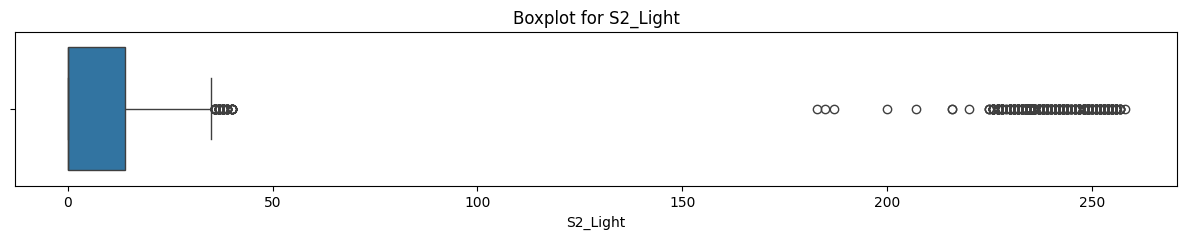

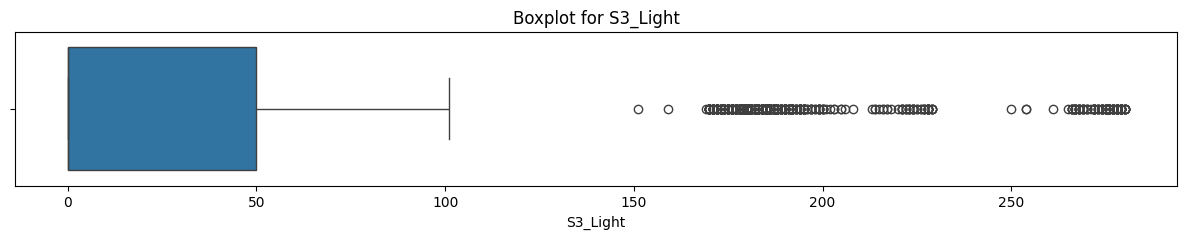

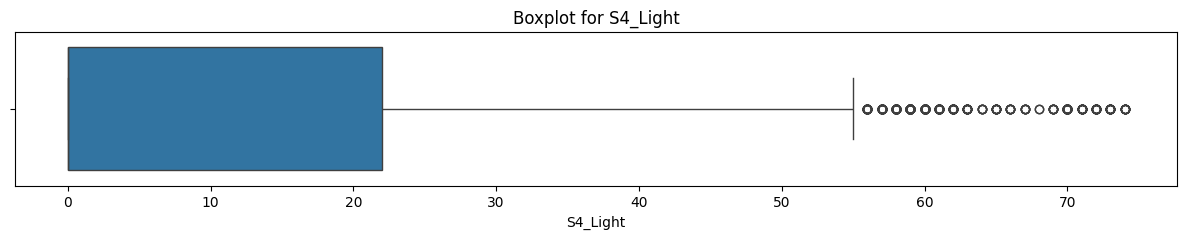

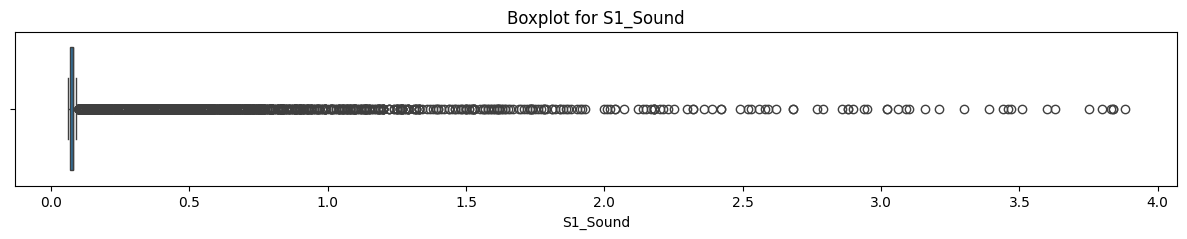

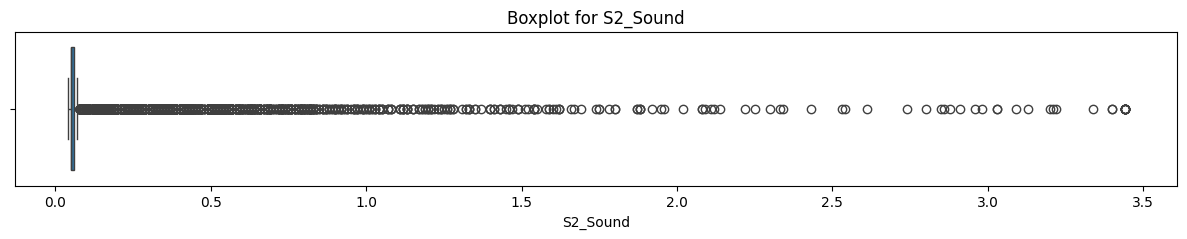

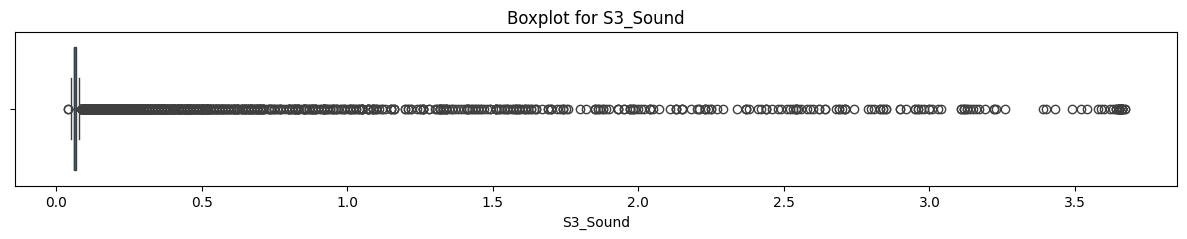

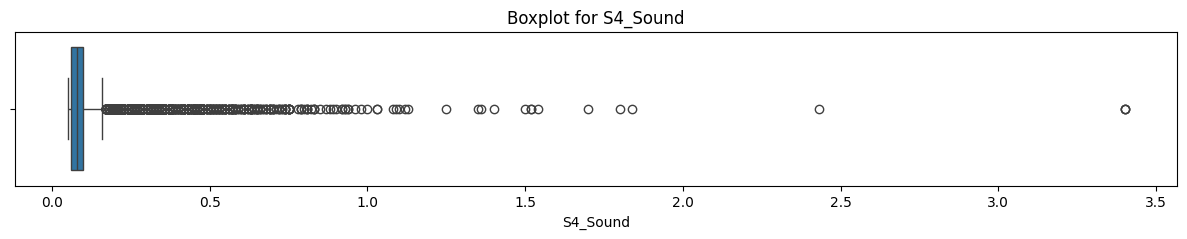

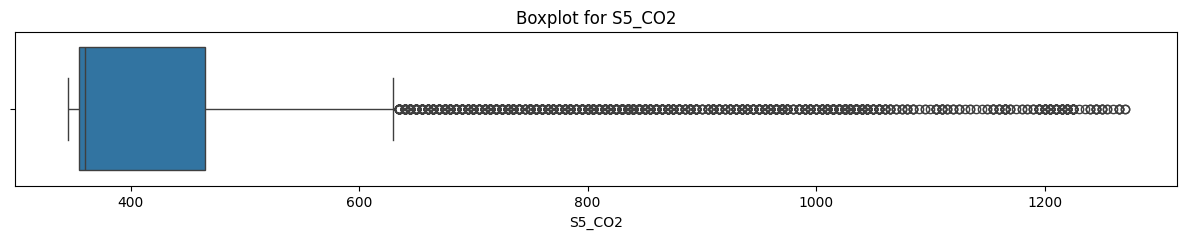

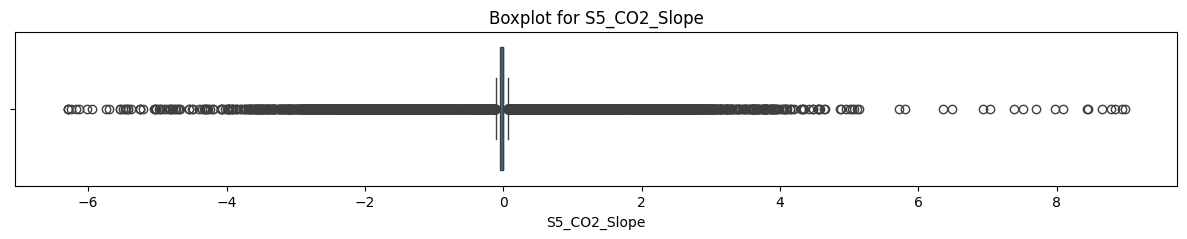

In [18]:
for i in num_cols:
  plt.figure(figsize=(15,2))
  sns.boxplot(data = df, x = i)
  plt.title('Boxplot for {}'.format(i))

# Correlation between numerical features

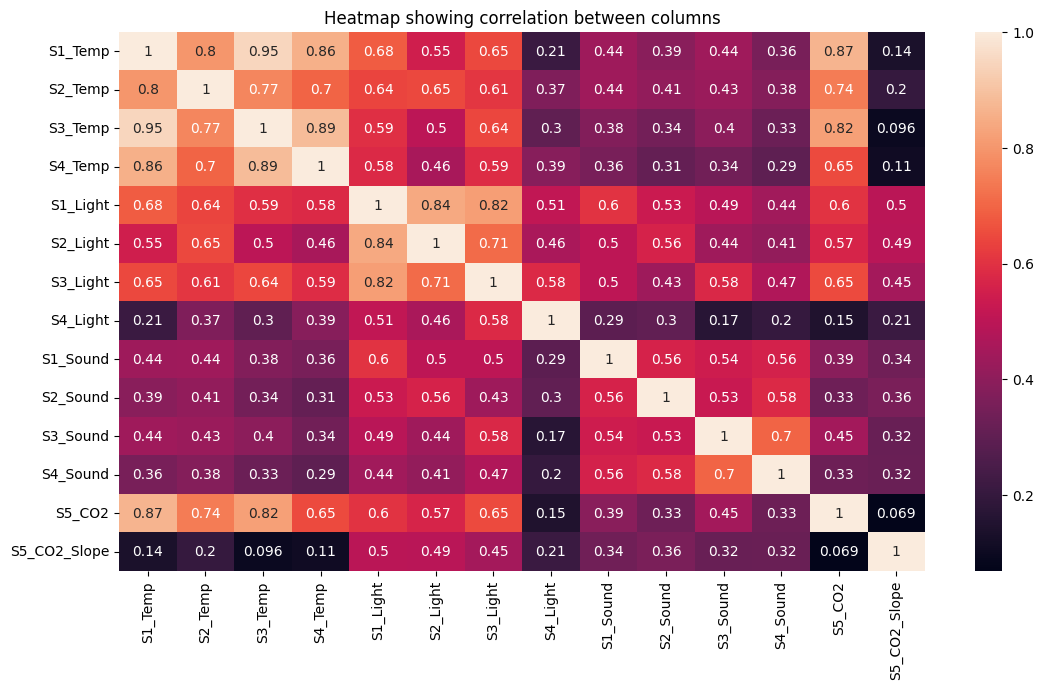

In [19]:
plt.figure(figsize=(13,7))
sns.heatmap(df[num_cols].corr(),annot = True)
plt.title('Heatmap showing correlation between columns')
plt.show()

# Count of Room Occupancy

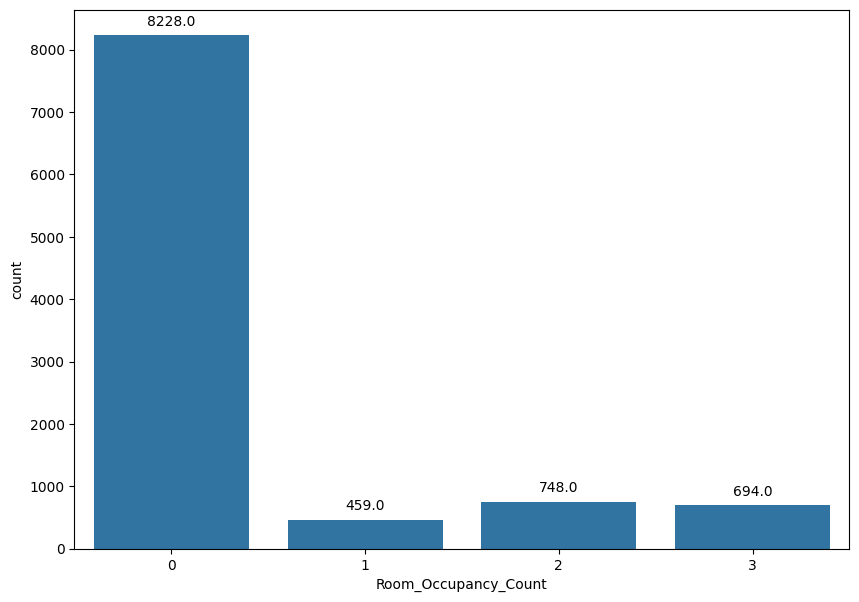

In [20]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data = df,x = 'Room_Occupancy_Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

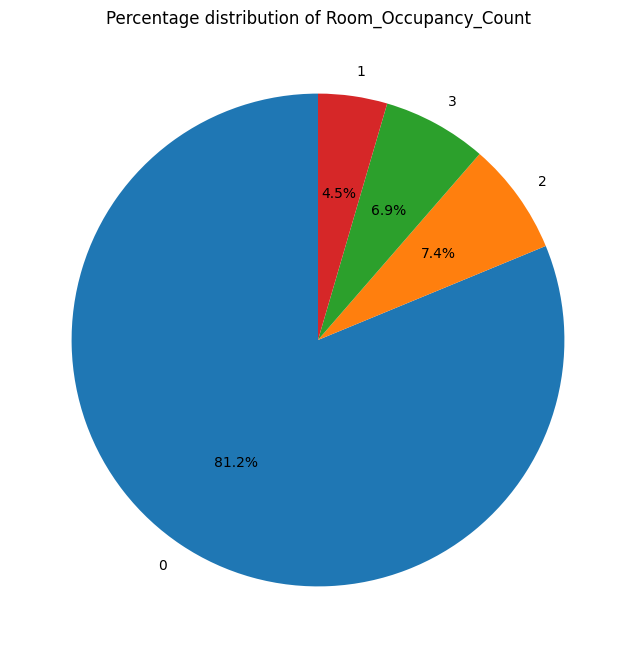

In [21]:
value_counts = df['Room_Occupancy_Count'].value_counts()

percentages = (value_counts / value_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of Room_Occupancy_Count')
plt.show()

# Data Pre-processing

In [22]:
label_encoder = LabelEncoder()
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])

# Removing columns with high correlation (> 0.9) and also removing redundant columns

In [23]:
df1 = df.copy()

In [24]:
df1.drop(columns=['Date','Time','Date_time','S1_Temp','S3_Temp'],axis=1,inplace=True)

In [25]:
df1.head()

,Time_of_Day,S2_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2,24.75,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2,24.75,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2,24.75,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2,24.75,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2,24.75,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# Functions for splitting data and standardization

In [26]:
def split_data(data):

  X = data.loc[:, data.columns!='Room_Occupancy_Count']
  y = data['Room_Occupancy_Count']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify = y)

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify = y_train)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [27]:
def standardize_data(X_train, X_val, X_test):
  mean = np.mean(X_train,axis=0)
  std = np.std(X_train,axis=0)

  X_train = (X_train - mean) / std
  X_val = (X_val - mean) / std
  X_test = (X_test - mean) / std

  return X_train, X_val, X_test

# Handling Class Imbalance

In [28]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split the data first
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Original Class Distribution:", Counter(y_train))
print("Resampled Class Distribution:", Counter(y_train_resampled))

# Standardize the data (optional, after resampling)
X_train_resampled, X_val, X_test = standardize_data(X_train_resampled, X_val, X_test)



Original Class Distribution: Counter({0: 5265, 2: 479, 3: 444, 1: 294})
Resampled Class Distribution: Counter({0: 5265, 3: 5265, 2: 5265, 1: 5265})


# Model Selection and Training

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on Validation Set
rf_val_preds = rf_model.predict(X_val)
lr_val_preds = lr_model.predict(X_val)

print("Random Forest Validation Performance:")
print(classification_report(y_val, rf_val_preds, digits=6))  # High precision
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_val_preds))

print("Logistic Regression Validation Performance:")
print(classification_report(y_val, lr_val_preds, digits=6))  # High precision
print("Confusion Matrix:\n", confusion_matrix(y_val, lr_val_preds))


Random Forest Validation Performance:
              precision    recall  f1-score   support

           0   0.999241  1.000000  0.999620      1317
           1   1.000000  1.000000  1.000000        73
           2   0.983471  0.991667  0.987552       120
           3   0.990826  0.972973  0.981818       111

    accuracy                       0.997532      1621
   macro avg   0.993385  0.991160  0.992248      1621
weighted avg   0.997532  0.997532  0.997525      1621

Confusion Matrix:
 [[1317    0    0    0]
 [   0   73    0    0]
 [   0    0  119    1]
 [   1    0    2  108]]
Logistic Regression Validation Performance:
              precision    recall  f1-score   support

           0   1.000000  0.997722  0.998860      1317
           1   1.000000  1.000000  1.000000        73
           2   0.966942  0.975000  0.970954       120
           3   0.946903  0.963964  0.955357       111

    accuracy                       0.993831      1621
   macro avg   0.978461  0.984172  0.981293  

# Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on Validation Set
best_rf_model = grid_search.best_estimator_
rf_val_preds_tuned = best_rf_model.predict(X_val)

print("Tuned Random Forest Validation Performance:")
print(classification_report(y_val, rf_val_preds_tuned,digits=6))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Validation Performance:
              precision    recall  f1-score   support

           0   0.999241  1.000000  0.999620      1317
           1   1.000000  1.000000  1.000000        73
           2   0.983471  0.991667  0.987552       120
           3   0.990826  0.972973  0.981818       111

    accuracy                       0.997532      1621
   macro avg   0.993385  0.991160  0.992248      1621
weighted avg   0.997532  0.997532  0.997525      1621



# Final Evaluation on Test Set

In [33]:
# Random Forest Test Performance
rf_test_preds = best_rf_model.predict(X_test)
print("Tuned Random Forest Test Performance:")
print(classification_report(y_test, rf_test_preds,digits=6))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_test_preds))

# Logistic Regression Test Performance
lr_test_preds = lr_model.predict(X_test)
print("Logistic Regression Test Performance:")
print(classification_report(y_test, lr_test_preds,digits=6))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_test_preds))


Tuned Random Forest Test Performance:
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1646
           1   1.000000  1.000000  1.000000        92
           2   0.993289  0.993289  0.993289       149
           3   0.992806  0.992806  0.992806       139

    accuracy                       0.999013      2026
   macro avg   0.996524  0.996524  0.996524      2026
weighted avg   0.999013  0.999013  0.999013      2026

Confusion Matrix:
 [[1646    0    0    0]
 [   0   92    0    0]
 [   0    0  148    1]
 [   0    0    1  138]]
Logistic Regression Test Performance:
              precision    recall  f1-score   support

           0   1.000000  0.998177  0.999088      1646
           1   1.000000  1.000000  1.000000        92
           2   0.986395  0.973154  0.979730       149
           3   0.951389  0.985612  0.968198       139

    accuracy                       0.995558      2026
   macro avg   0.984446  0.989236  0.986754      20

# Comparison

In [34]:
import pandas as pd

# Collect Metrics
metrics = {
    'Model': ['Random Forest (Tuned)', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, rf_test_preds),
        accuracy_score(y_test, lr_test_preds)
    ],
    'Precision': [
        classification_report(y_test, rf_test_preds, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, lr_test_preds, output_dict=True)['weighted avg']['precision']
    ],
    'Recall': [
        classification_report(y_test, rf_test_preds, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, lr_test_preds, output_dict=True)['weighted avg']['recall']
    ],
    'F1-Score': [
        classification_report(y_test, rf_test_preds, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, lr_test_preds, output_dict=True)['weighted avg']['f1-score']
    ]
}

# Display as DataFrame
comparison_df = pd.DataFrame(metrics)
print(comparison_df)


                   Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest (Tuned)  0.999013   0.999013  0.999013  0.999013
1    Logistic Regression  0.995558   0.995664  0.995558  0.995586
